# -*- coding: utf-8 -*-
#code-7-5.py
#用MLP识别MNIST字符

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
plt.rcParams['font.family'] = 'SimHei'  # 设置字体为中文字体，如宋体、黑体等

## 绘制学习曲线的函数
- plt.title(title): 设置图像的标题。
- if ylim is not None: plt.ylim(*ylim): 如果给定了y轴的取值范围限制ylim，则将y轴的范围设置为ylim。
- plt.xlabel("Training examples")和plt.ylabel("Score"): 设置x轴和y轴的标题。
- train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes): 使用learning_curve函数计算不同训练集大小下的训练得分和测试得分。
- train_scores_mean = np.mean(train_scores, axis=1)和train_scores_std = np.std(train_scores, axis=1): 计算训练得分的平均值和标准差。
- test_scores_mean = np.mean(test_scores, axis=1)和test_scores_std = np.std(test_scores, axis=1): 计算测试得分的平均值和标准差。
- plt.grid(): 设置背景为网格线。
- plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color='r'): 使用fill_between函数在图像中填充训练得分的平均值的上下方差空间，用红色标识。
- plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=0.1, color='g'): 使用fill_between函数在图像中填充测试得分的平均值的上下方差空间，用绿色标识。
- plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score'): 使用plot函数绘制训练得分的平均值曲线，用红色圆点线表示。
- plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross_validation score'): 使用plot函数绘制测试得分的平均值曲线，用绿色圆点线表示。
- plt.legend(loc='best'): 在最佳位置显示图例。

In [2]:
# estimator: 使用的机器学习模型
# title: 图像的标题
# X: 特征数据
# y: 目标数据
# ylim: y轴的取值范围限制
# cv: 交叉验证的折数
# n_jobs: 并行运行的作业数
# train_sizes: 训练集的大小，使用np.linspace函数生成从0.1到1.0之间的5个等间隔值
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(0.1,1.0,5)):
    plt.title(title)#图像标题
    if ylim is not None:#y轴限制不为空时
        plt.ylim(*ylim)
    plt.xlabel("Training examples")#两个标题
    plt.ylabel("Score")
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)#获取训练集大小，训练得分集合，测试得分集合
    train_scores_mean=np.mean(train_scores,axis=1)#将训练得分集合按行的到平均值
    train_scores_std=np.std(train_scores,axis=1)#计算训练矩阵的标准方差
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.grid()#背景设置为网格线
    
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    # plt.fill_between()函数会把模型准确性的平均值的上下方差的空间里用颜色填充。
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color='r',label='Training score')
    # 然后用plt.plot()函数画出模型准确性的平均值
    plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='Cross_validation score')
    plt.legend(loc='best')#显示图例
    return plt
    

## 获取MNIST数据集

In [3]:
#获取MNIST数据集
mnist = fetch_openml('mnist_784', version=1)
#获取特征和目标值
X = mnist.data
y = mnist.target
#像素灰度值归一化
X = X / 255.

## 分割训练集和测试集，并定义MLP模型
- 将特征数据集X和目标数据集y分割成训练集和测试集。训练集包括前60000个样本，而测试集包括从第60000个样本开始的剩余样本。

- 定义了一个多层感知器（MLP）模型，使用了1个隐含层和50个隐含节点。MLP是一种人工神经网络模型，它由多个神经元层组成，每个神经元层与下一层全连接。

- 模型的训练周期（即迭代次数）设置为10，采用随机梯度下降（SGD）算法进行优化。学习率初始化为0.1，控制模型参数的更新步长。

In [4]:
# 分割训练集和测试集
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
#定义MLP模型，1个隐含层，含50个隐结点，训练周期为10
#采用SGD算法，学习率0.1
mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=10, 
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

## 训练MLP模型，评估性能并显示分类报告
- mlp.fit(X_train, y_train)：这行代码用训练集（X_train和y_train）对MLP模型进行训练。模型将根据训练数据学习权重和偏差，以便进行准确的预测。

- mlp.score(X_train, y_train)：这行代码计算并输出了模型在训练集上的得分（准确率）。该得分表示模型在训练集上正确预测的比例。

- mlp.score(X_test, y_test)：这行代码计算并输出了模型在测试集上的得分（准确率）。该得分表示模型在测试集上正确预测的比例。

- classification_report(y_test, mlp.predict(X_test))：这行代码生成并打印了一个分类报告，其中包含了模型在测试集上每个类别的准确率、召回率、F1分数等评估指标。y_test是真实的标签，mlp.predict(X_test)是模型对测试集样本的预测结果。

In [5]:
mlp.fit(X_train, y_train)
print("训练集得分: %f" % mlp.score(X_train, y_train))
print("测试集得分: %f" % mlp.score(X_test, y_test))
print(classification_report(y_test, mlp.predict(X_test)))

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


训练集得分: 0.986800
测试集得分: 0.970000
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## 绘制学习曲线
- mlp：训练好的MLP模型，用于绘制学习曲线。
- '学习曲线'：图像的标题，将显示在绘图中。
- X：特征数据集。
- y：目标数据集。
- ylim=(0.1, 1.01)：y轴的取值范围限制，这里设置为(0.1, 1.01)。

Iteration 1, loss = 0.92847683
Iteration 2, loss = 0.36426012
Iteration 3, loss = 0.27696218
Iteration 4, loss = 0.22954860
Iteration 5, loss = 0.19552531
Iteration 6, loss = 0.16538064
Iteration 7, loss = 0.14122064
Iteration 8, loss = 0.12040514
Iteration 9, loss = 0.10494098
Iteration 10, loss = 0.08824342


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53184259
Iteration 2, loss = 0.25018873
Iteration 3, loss = 0.18826517
Iteration 4, loss = 0.15250220
Iteration 5, loss = 0.12770285
Iteration 6, loss = 0.10512397
Iteration 7, loss = 0.09141866
Iteration 8, loss = 0.07742120
Iteration 9, loss = 0.06577267
Iteration 10, loss = 0.05698748


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42602549
Iteration 2, loss = 0.19870415
Iteration 3, loss = 0.14913090
Iteration 4, loss = 0.11957041
Iteration 5, loss = 0.09943671
Iteration 6, loss = 0.08545404
Iteration 7, loss = 0.07190709
Iteration 8, loss = 0.06276560
Iteration 9, loss = 0.05430212
Iteration 10, loss = 0.04850841


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.36810977
Iteration 2, loss = 0.17904204
Iteration 3, loss = 0.13617391
Iteration 4, loss = 0.11051072
Iteration 5, loss = 0.09241599
Iteration 6, loss = 0.08007734
Iteration 7, loss = 0.07039449
Iteration 8, loss = 0.06290828
Iteration 9, loss = 0.05621400
Iteration 10, loss = 0.05002507


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32817991
Iteration 2, loss = 0.15721665
Iteration 3, loss = 0.11808366
Iteration 4, loss = 0.09831911
Iteration 5, loss = 0.08243663
Iteration 6, loss = 0.07224013
Iteration 7, loss = 0.06258116
Iteration 8, loss = 0.05723998
Iteration 9, loss = 0.05220361
Iteration 10, loss = 0.04713171


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86776282
Iteration 2, loss = 0.33559040
Iteration 3, loss = 0.25639434
Iteration 4, loss = 0.21325686
Iteration 5, loss = 0.18043673
Iteration 6, loss = 0.15390556
Iteration 7, loss = 0.13291540
Iteration 8, loss = 0.11193104
Iteration 9, loss = 0.09776659
Iteration 10, loss = 0.08492764


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52933344
Iteration 2, loss = 0.24532018
Iteration 3, loss = 0.18596942
Iteration 4, loss = 0.14921690
Iteration 5, loss = 0.12078564
Iteration 6, loss = 0.10302481
Iteration 7, loss = 0.08678175
Iteration 8, loss = 0.07343983
Iteration 9, loss = 0.06301519
Iteration 10, loss = 0.05357177


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42544757
Iteration 2, loss = 0.20245505
Iteration 3, loss = 0.15111248
Iteration 4, loss = 0.12107416
Iteration 5, loss = 0.10041214
Iteration 6, loss = 0.08466474
Iteration 7, loss = 0.07344495
Iteration 8, loss = 0.06190134
Iteration 9, loss = 0.05523645
Iteration 10, loss = 0.04936720


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.36634279
Iteration 2, loss = 0.17715181
Iteration 3, loss = 0.13169364
Iteration 4, loss = 0.10694955
Iteration 5, loss = 0.09066095
Iteration 6, loss = 0.07642754
Iteration 7, loss = 0.06769080
Iteration 8, loss = 0.05962171
Iteration 9, loss = 0.05426006
Iteration 10, loss = 0.04736861


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32912405
Iteration 2, loss = 0.15931694
Iteration 3, loss = 0.11931734
Iteration 4, loss = 0.09885455
Iteration 5, loss = 0.08292791
Iteration 6, loss = 0.07239752
Iteration 7, loss = 0.06360638
Iteration 8, loss = 0.05743776
Iteration 9, loss = 0.05046039
Iteration 10, loss = 0.04670490


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86776282
Iteration 2, loss = 0.33559040
Iteration 3, loss = 0.25639434
Iteration 4, loss = 0.21325686
Iteration 5, loss = 0.18043673
Iteration 6, loss = 0.15390556
Iteration 7, loss = 0.13291540
Iteration 8, loss = 0.11193104
Iteration 9, loss = 0.09776659
Iteration 10, loss = 0.08492764


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52183844
Iteration 2, loss = 0.24417397
Iteration 3, loss = 0.18459872
Iteration 4, loss = 0.15021700
Iteration 5, loss = 0.12287745
Iteration 6, loss = 0.10576869
Iteration 7, loss = 0.08987797
Iteration 8, loss = 0.07718947
Iteration 9, loss = 0.06741365
Iteration 10, loss = 0.05769676


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42109629
Iteration 2, loss = 0.19955730
Iteration 3, loss = 0.14783286
Iteration 4, loss = 0.12005346
Iteration 5, loss = 0.09930693
Iteration 6, loss = 0.08623390
Iteration 7, loss = 0.07416927
Iteration 8, loss = 0.06595771
Iteration 9, loss = 0.05601146
Iteration 10, loss = 0.04914449


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.36170586
Iteration 2, loss = 0.17507275
Iteration 3, loss = 0.13131795
Iteration 4, loss = 0.10614607
Iteration 5, loss = 0.08898812
Iteration 6, loss = 0.07741397
Iteration 7, loss = 0.06676295
Iteration 8, loss = 0.05929872
Iteration 9, loss = 0.05333595
Iteration 10, loss = 0.04743625


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32340128
Iteration 2, loss = 0.15669574
Iteration 3, loss = 0.11890085
Iteration 4, loss = 0.09789704
Iteration 5, loss = 0.08258731
Iteration 6, loss = 0.07155856
Iteration 7, loss = 0.06250955
Iteration 8, loss = 0.05754445
Iteration 9, loss = 0.05073069
Iteration 10, loss = 0.04654131


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86776282
Iteration 2, loss = 0.33559040
Iteration 3, loss = 0.25639434
Iteration 4, loss = 0.21325686
Iteration 5, loss = 0.18043673
Iteration 6, loss = 0.15390556
Iteration 7, loss = 0.13291540
Iteration 8, loss = 0.11193104
Iteration 9, loss = 0.09776659
Iteration 10, loss = 0.08492764


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52183844
Iteration 2, loss = 0.24417397
Iteration 3, loss = 0.18459872
Iteration 4, loss = 0.15021700
Iteration 5, loss = 0.12287745
Iteration 6, loss = 0.10576869
Iteration 7, loss = 0.08987797
Iteration 8, loss = 0.07718947
Iteration 9, loss = 0.06741365
Iteration 10, loss = 0.05769676


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.41909586
Iteration 2, loss = 0.19821641
Iteration 3, loss = 0.14923728
Iteration 4, loss = 0.12179897
Iteration 5, loss = 0.10130215
Iteration 6, loss = 0.08719502
Iteration 7, loss = 0.07421189
Iteration 8, loss = 0.06554629
Iteration 9, loss = 0.05604526
Iteration 10, loss = 0.05019750


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.36330390
Iteration 2, loss = 0.17336155
Iteration 3, loss = 0.12837716
Iteration 4, loss = 0.10331013
Iteration 5, loss = 0.08708097
Iteration 6, loss = 0.07504888
Iteration 7, loss = 0.06511601
Iteration 8, loss = 0.05665129
Iteration 9, loss = 0.04990184
Iteration 10, loss = 0.04385401


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32203470
Iteration 2, loss = 0.15358235
Iteration 3, loss = 0.11688160
Iteration 4, loss = 0.09574076
Iteration 5, loss = 0.08217601
Iteration 6, loss = 0.07017785
Iteration 7, loss = 0.06279693
Iteration 8, loss = 0.05508218
Iteration 9, loss = 0.04950488
Iteration 10, loss = 0.04494384


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86776282
Iteration 2, loss = 0.33559040
Iteration 3, loss = 0.25639434
Iteration 4, loss = 0.21325686
Iteration 5, loss = 0.18043673
Iteration 6, loss = 0.15390556
Iteration 7, loss = 0.13291540
Iteration 8, loss = 0.11193104
Iteration 9, loss = 0.09776659
Iteration 10, loss = 0.08492764


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52183844
Iteration 2, loss = 0.24417397
Iteration 3, loss = 0.18459872
Iteration 4, loss = 0.15021700
Iteration 5, loss = 0.12287745
Iteration 6, loss = 0.10576869
Iteration 7, loss = 0.08987797
Iteration 8, loss = 0.07718947
Iteration 9, loss = 0.06741365
Iteration 10, loss = 0.05769676


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.41909586
Iteration 2, loss = 0.19821641
Iteration 3, loss = 0.14923728
Iteration 4, loss = 0.12179897
Iteration 5, loss = 0.10130215
Iteration 6, loss = 0.08719502
Iteration 7, loss = 0.07421189
Iteration 8, loss = 0.06554629
Iteration 9, loss = 0.05604526
Iteration 10, loss = 0.05019750


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.36487747
Iteration 2, loss = 0.17405236
Iteration 3, loss = 0.12954579
Iteration 4, loss = 0.10490883
Iteration 5, loss = 0.08886729
Iteration 6, loss = 0.07568321
Iteration 7, loss = 0.06537523
Iteration 8, loss = 0.05742827
Iteration 9, loss = 0.05057286
Iteration 10, loss = 0.04419753


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.33111374
Iteration 2, loss = 0.15965087
Iteration 3, loss = 0.11961027
Iteration 4, loss = 0.09677512
Iteration 5, loss = 0.08429765
Iteration 6, loss = 0.07158456
Iteration 7, loss = 0.06497925
Iteration 8, loss = 0.05832347
Iteration 9, loss = 0.05169443
Iteration 10, loss = 0.04605703


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


<module 'matplotlib.pyplot' from '/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/matplotlib/pyplot.py'>

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

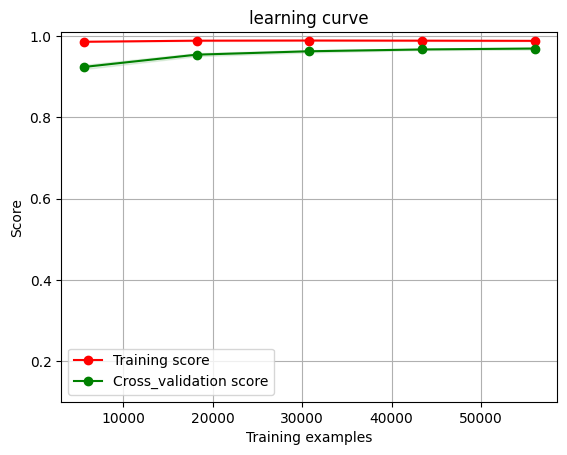

In [6]:
plot_learning_curve(mlp, 'learning curve', X, y, ylim=(0.1, 1.01))

- 横轴表示训练样本数量，纵轴表示模型的得分（准确率）。
- 训练得分曲线反映了模型在训练集上的性能随着样本数量增加的变化趋势。
- 交叉验证得分曲线反映了模型在交叉验证集（这里使用的是默认的交叉验证方法）上的性能随着样本数量增加的变化趋势。

## 可视化MLP模型的权重
- plot_learning_curve(mlp, 'Learning Curves', X, y, ylim=(0.1, 1.01))：这行代码调用了之前定义的plot_learning_curve函数，绘制学习曲线。参数包括已训练的MLP模型mlp、图像的标题'Learning Curves'、特征数据集X和目标数据集y，以及y轴的取值范围限制ylim。

- fig, axes = plt.subplots(4, 4)：这行代码创建了一个4x4的子图网格，用于展示模型的权重可视化。fig表示整个图像对象，axes是包含所有子图的数组。

- vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[0].max()：这行代码计算了模型权重的最小值vmin和最大值vmax，以确保所有权重都在相同的颜色范围内显示。

- for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):：这行代码使用zip函数将模型的第一个隐含层权重mlp.coefs_[0]和对应的子图对象进行迭代。coef表示当前迭代的权重数组，ax表示当前迭代的子图对象。

- ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)：这行代码在当前子图对象上绘制权重矩阵的可视化图像。coef.reshape(28, 28)将权重数组重新调整为28x28的矩阵形式，cmap=plt.cm.gray指定使用灰度颜色映射，vmin=.5 * vmin和vmax=.5 * vmax设置颜色映射的范围。

- ax.set_xticks(())和ax.set_yticks(())：这两行代码设置子图的x轴和y轴刻度为空，以隐藏刻度标签。

Iteration 1, loss = 0.92847683
Iteration 2, loss = 0.36426012
Iteration 3, loss = 0.27696218
Iteration 4, loss = 0.22954860
Iteration 5, loss = 0.19552531
Iteration 6, loss = 0.16538064
Iteration 7, loss = 0.14122064
Iteration 8, loss = 0.12040514
Iteration 9, loss = 0.10494098
Iteration 10, loss = 0.08824342


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53184259
Iteration 2, loss = 0.25018873
Iteration 3, loss = 0.18826517
Iteration 4, loss = 0.15250220
Iteration 5, loss = 0.12770285
Iteration 6, loss = 0.10512397
Iteration 7, loss = 0.09141866
Iteration 8, loss = 0.07742120
Iteration 9, loss = 0.06577267
Iteration 10, loss = 0.05698748


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42602549
Iteration 2, loss = 0.19870415
Iteration 3, loss = 0.14913090
Iteration 4, loss = 0.11957041
Iteration 5, loss = 0.09943671
Iteration 6, loss = 0.08545404
Iteration 7, loss = 0.07190709
Iteration 8, loss = 0.06276560
Iteration 9, loss = 0.05430212
Iteration 10, loss = 0.04850841


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.36810977
Iteration 2, loss = 0.17904204
Iteration 3, loss = 0.13617391
Iteration 4, loss = 0.11051072
Iteration 5, loss = 0.09241599
Iteration 6, loss = 0.08007734
Iteration 7, loss = 0.07039449
Iteration 8, loss = 0.06290828
Iteration 9, loss = 0.05621400
Iteration 10, loss = 0.05002507


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32817991
Iteration 2, loss = 0.15721665
Iteration 3, loss = 0.11808366
Iteration 4, loss = 0.09831911
Iteration 5, loss = 0.08243663
Iteration 6, loss = 0.07224013
Iteration 7, loss = 0.06258116
Iteration 8, loss = 0.05723998
Iteration 9, loss = 0.05220361
Iteration 10, loss = 0.04713171


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86776282
Iteration 2, loss = 0.33559040
Iteration 3, loss = 0.25639434
Iteration 4, loss = 0.21325686
Iteration 5, loss = 0.18043673
Iteration 6, loss = 0.15390556
Iteration 7, loss = 0.13291540
Iteration 8, loss = 0.11193104
Iteration 9, loss = 0.09776659
Iteration 10, loss = 0.08492764


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52933344
Iteration 2, loss = 0.24532018
Iteration 3, loss = 0.18596942
Iteration 4, loss = 0.14921690
Iteration 5, loss = 0.12078564
Iteration 6, loss = 0.10302481
Iteration 7, loss = 0.08678175
Iteration 8, loss = 0.07343983
Iteration 9, loss = 0.06301519
Iteration 10, loss = 0.05357177


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42544757
Iteration 2, loss = 0.20245505
Iteration 3, loss = 0.15111248
Iteration 4, loss = 0.12107416
Iteration 5, loss = 0.10041214
Iteration 6, loss = 0.08466474
Iteration 7, loss = 0.07344495
Iteration 8, loss = 0.06190134
Iteration 9, loss = 0.05523645
Iteration 10, loss = 0.04936720


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.36634279
Iteration 2, loss = 0.17715181
Iteration 3, loss = 0.13169364
Iteration 4, loss = 0.10694955
Iteration 5, loss = 0.09066095
Iteration 6, loss = 0.07642754
Iteration 7, loss = 0.06769080
Iteration 8, loss = 0.05962171
Iteration 9, loss = 0.05426006
Iteration 10, loss = 0.04736861


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32912405
Iteration 2, loss = 0.15931694
Iteration 3, loss = 0.11931734
Iteration 4, loss = 0.09885455
Iteration 5, loss = 0.08292791
Iteration 6, loss = 0.07239752
Iteration 7, loss = 0.06360638
Iteration 8, loss = 0.05743776
Iteration 9, loss = 0.05046039
Iteration 10, loss = 0.04670490


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86776282
Iteration 2, loss = 0.33559040
Iteration 3, loss = 0.25639434
Iteration 4, loss = 0.21325686
Iteration 5, loss = 0.18043673
Iteration 6, loss = 0.15390556
Iteration 7, loss = 0.13291540
Iteration 8, loss = 0.11193104
Iteration 9, loss = 0.09776659
Iteration 10, loss = 0.08492764


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52183844
Iteration 2, loss = 0.24417397
Iteration 3, loss = 0.18459872
Iteration 4, loss = 0.15021700
Iteration 5, loss = 0.12287745
Iteration 6, loss = 0.10576869
Iteration 7, loss = 0.08987797
Iteration 8, loss = 0.07718947
Iteration 9, loss = 0.06741365
Iteration 10, loss = 0.05769676


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42109629
Iteration 2, loss = 0.19955730
Iteration 3, loss = 0.14783286
Iteration 4, loss = 0.12005346
Iteration 5, loss = 0.09930693
Iteration 6, loss = 0.08623390
Iteration 7, loss = 0.07416927
Iteration 8, loss = 0.06595771
Iteration 9, loss = 0.05601146
Iteration 10, loss = 0.04914449


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.36170586
Iteration 2, loss = 0.17507275
Iteration 3, loss = 0.13131795
Iteration 4, loss = 0.10614607
Iteration 5, loss = 0.08898812
Iteration 6, loss = 0.07741397
Iteration 7, loss = 0.06676295
Iteration 8, loss = 0.05929872
Iteration 9, loss = 0.05333595
Iteration 10, loss = 0.04743625


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32340128
Iteration 2, loss = 0.15669574
Iteration 3, loss = 0.11890085
Iteration 4, loss = 0.09789704
Iteration 5, loss = 0.08258731
Iteration 6, loss = 0.07155856
Iteration 7, loss = 0.06250955
Iteration 8, loss = 0.05754445
Iteration 9, loss = 0.05073069
Iteration 10, loss = 0.04654131


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86776282
Iteration 2, loss = 0.33559040
Iteration 3, loss = 0.25639434
Iteration 4, loss = 0.21325686
Iteration 5, loss = 0.18043673
Iteration 6, loss = 0.15390556
Iteration 7, loss = 0.13291540
Iteration 8, loss = 0.11193104
Iteration 9, loss = 0.09776659
Iteration 10, loss = 0.08492764


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52183844
Iteration 2, loss = 0.24417397
Iteration 3, loss = 0.18459872
Iteration 4, loss = 0.15021700
Iteration 5, loss = 0.12287745
Iteration 6, loss = 0.10576869
Iteration 7, loss = 0.08987797
Iteration 8, loss = 0.07718947
Iteration 9, loss = 0.06741365
Iteration 10, loss = 0.05769676


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.41909586
Iteration 2, loss = 0.19821641
Iteration 3, loss = 0.14923728
Iteration 4, loss = 0.12179897
Iteration 5, loss = 0.10130215
Iteration 6, loss = 0.08719502
Iteration 7, loss = 0.07421189
Iteration 8, loss = 0.06554629
Iteration 9, loss = 0.05604526
Iteration 10, loss = 0.05019750


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.36330390
Iteration 2, loss = 0.17336155
Iteration 3, loss = 0.12837716
Iteration 4, loss = 0.10331013
Iteration 5, loss = 0.08708097
Iteration 6, loss = 0.07504888
Iteration 7, loss = 0.06511601
Iteration 8, loss = 0.05665129
Iteration 9, loss = 0.04990184
Iteration 10, loss = 0.04385401


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32203470
Iteration 2, loss = 0.15358235
Iteration 3, loss = 0.11688160
Iteration 4, loss = 0.09574076
Iteration 5, loss = 0.08217601
Iteration 6, loss = 0.07017785
Iteration 7, loss = 0.06279693
Iteration 8, loss = 0.05508218
Iteration 9, loss = 0.04950488
Iteration 10, loss = 0.04494384


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.86776282
Iteration 2, loss = 0.33559040
Iteration 3, loss = 0.25639434
Iteration 4, loss = 0.21325686
Iteration 5, loss = 0.18043673
Iteration 6, loss = 0.15390556
Iteration 7, loss = 0.13291540
Iteration 8, loss = 0.11193104
Iteration 9, loss = 0.09776659
Iteration 10, loss = 0.08492764


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52183844
Iteration 2, loss = 0.24417397
Iteration 3, loss = 0.18459872
Iteration 4, loss = 0.15021700
Iteration 5, loss = 0.12287745
Iteration 6, loss = 0.10576869
Iteration 7, loss = 0.08987797
Iteration 8, loss = 0.07718947
Iteration 9, loss = 0.06741365
Iteration 10, loss = 0.05769676


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.41909586
Iteration 2, loss = 0.19821641
Iteration 3, loss = 0.14923728
Iteration 4, loss = 0.12179897
Iteration 5, loss = 0.10130215
Iteration 6, loss = 0.08719502
Iteration 7, loss = 0.07421189
Iteration 8, loss = 0.06554629
Iteration 9, loss = 0.05604526
Iteration 10, loss = 0.05019750


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.36487747
Iteration 2, loss = 0.17405236
Iteration 3, loss = 0.12954579
Iteration 4, loss = 0.10490883
Iteration 5, loss = 0.08886729
Iteration 6, loss = 0.07568321
Iteration 7, loss = 0.06537523
Iteration 8, loss = 0.05742827
Iteration 9, loss = 0.05057286
Iteration 10, loss = 0.04419753


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.33111374
Iteration 2, loss = 0.15965087
Iteration 3, loss = 0.11961027
Iteration 4, loss = 0.09677512
Iteration 5, loss = 0.08429765
Iteration 6, loss = 0.07158456
Iteration 7, loss = 0.06497925
Iteration 8, loss = 0.05832347
Iteration 9, loss = 0.05169443
Iteration 10, loss = 0.04605703


/home/stu_wxy/anaconda3/envs/Ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not fo

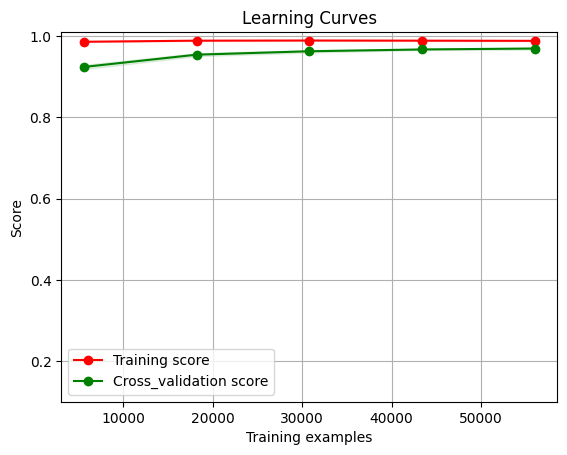

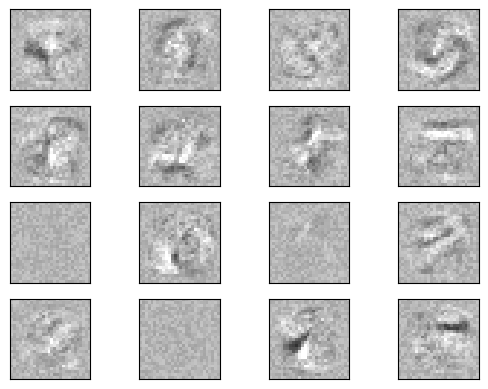

In [7]:
#For cross validation    
plot_learning_curve(mlp, 'Learning Curves', X, y, ylim=(0.1, 1.01))#开始绘制曲线

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()
